In [41]:
# Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow modules
import tensorflow as tf
from tensorflow	import keras

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [42]:
# Read csv 
df = pd.read_csv("admissions_data.csv")
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [43]:
# Split date into features and labels
features = df.iloc[:, 1:8]
labels = df.iloc[:,-1]

In [44]:
# Normalise date
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [45]:
# Split our training and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [46]:
# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(features.shape[1])))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

# Print model summary
model.summary()

# Configure optimiser
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# Compile model
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                128       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [47]:
# apply early stopping for efficiency
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Train model with h 100 epochs and a batch size of 8. Validation split at 0.1. Save history as a variable.
history = model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 1, validation_split=0.25, callbacks=[es])

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.2009 - mae: 0.3665 - val_loss: 0.0691 - val_mae: 0.2261
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0776 - mae: 0.2143 - val_loss: 0.0324 - val_mae: 0.1550
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0530 - mae: 0.1794 - val_loss: 0.0174 - val_mae: 0.1090
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0343 - mae: 0.1501 - val_loss: 0.0152 - val_mae: 0.1043
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.1335 - val_loss: 0.0127 - val_mae: 0.0898
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0233 - mae: 0.1205 - val_loss: 0.0085 - val_mae: 0.0694
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1187 - val_loss: 0.0100 - val_mae: 0.0835
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0197 - m

In [48]:
# Evalute the model and print performance
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error: ", val_mae)

# Evauate r-squared score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

Mean Absolute Error:  0.05405658110976219
4/4 [==============================] - 0s 1ms/step
0.769707475500984


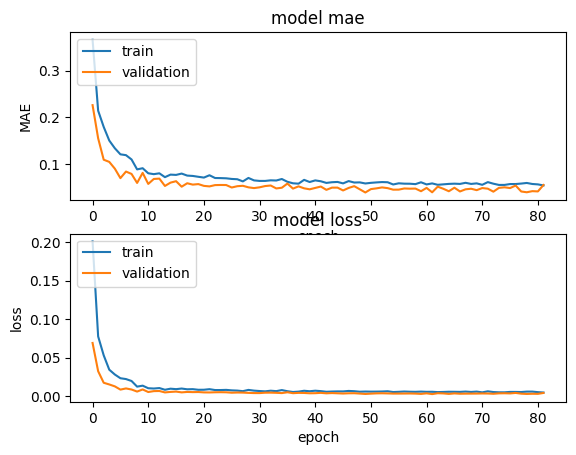

In [49]:
# Plot mean absolute error over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()